In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')


In [3]:
train_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])
train_data['cabin_multiple'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_adv,cabin_multiple
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,0


<AxesSubplot:>

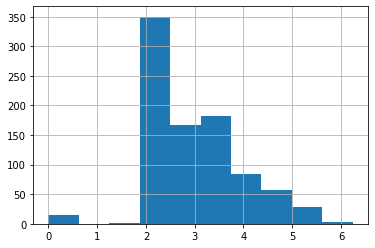

In [4]:
train_data.Age=train_data.Age.fillna(train_data.Age.median())
train_data.dropna(subset=["Embarked"],inplace=True)
train_data['norm_fare'] = np.log(train_data.Fare+1)
train_data['norm_fare'].hist()

In [5]:
train_data.Pclass=train_data.Pclass.astype(str)


In [6]:
train_dum=pd.get_dummies(train_data[["Sex","Embarked","cabin_multiple","cabin_adv","Pclass"]])
train_dum.head()

,cabin_multiple,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [7]:
x_data=train_data[["Age","SibSp","Parch","norm_fare"]]
y_data=train_data[["Survived"]]

In [8]:
y_data.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
x_data=pd.concat([train_dum,x_data],axis=1)


In [10]:
x_data.info

<bound method DataFrame.info of      cabin_multiple  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
0                 0           0         1           0           0           1   
1                 1           1         0           1           0           0   
2                 0           1         0           0           0           1   
3                 1           1         0           0           0           1   
4                 0           0         1           0           0           1   
..              ...         ...       ...         ...         ...         ...   
886               0           0         1           0           0           1   
887               1           1         0           0           0           1   
888               0           1         0           0           0           1   
889               1           0         1           1           0           0   
890               0           0         1           0           1           0

In [11]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#sc.fit(x_data)
#x_train_std=sc.transform(x_data)


In [12]:
#sc.fit(y_data)
#y_std=sc.transform(y_data)

In [13]:
print(x_data.shape)
print(y_data.shape)

(889, 22)
(889, 1)


In [14]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test_data['cabin_adv'] = test_data.Cabin.apply(lambda x: str(x)[0])
test_data['cabin_multiple'] = test_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
test_data.Age=test_data.Age.fillna(test_data.Age.median())
test_data.dropna(subset=["Embarked"],inplace=True)
test_data['norm_fare'] = np.log(test_data.Fare+1)

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_adv,cabin_multiple,norm_fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,n,0,2.178064
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,n,0,2.079442
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,n,0,2.369075
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,n,0,2.268252
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,n,0,2.586824


In [16]:
test_data.Pclass=test_data.Pclass.astype(str)

test_dum=pd.get_dummies(test_data[["Sex","Embarked","cabin_multiple","cabin_adv","Pclass"]])

x_test=test_data[["Age","SibSp","Parch","norm_fare"]]


x_test=pd.concat([test_dum,x_test],axis=1)



In [17]:
x_test.head()

,cabin_multiple,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,...,cabin_adv_F,cabin_adv_G,cabin_adv_n,Pclass_1,Pclass_2,Pclass_3,Age,SibSp,Parch,norm_fare
0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,34.5,0,0,2.178064
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,47.0,1,0,2.079442
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,62.0,0,0,2.369075
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,27.0,0,0,2.268252
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,22.0,1,1,2.586824


In [18]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#sc.fit(x_test)
#x_test_std=sc.transform(x_test)

In [19]:
#len(x_test_std)

In [20]:
x_test.norm_fare=x_test.norm_fare.fillna(x_test.norm_fare.mean())

In [21]:
x_data.columns


Index(['cabin_multiple', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C',
       'cabin_adv_D', 'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G',
       'cabin_adv_T', 'cabin_adv_n', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age',
       'SibSp', 'Parch', 'norm_fare'],
      dtype='object')

In [22]:
x_test.columns

Index(['cabin_multiple', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C',
       'cabin_adv_D', 'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G',
       'cabin_adv_n', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp',
       'Parch', 'norm_fare'],
      dtype='object')

In [23]:
x_test[["cabin_adv_T"]]=0

In [24]:
x_test.columns

Index(['cabin_multiple', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C',
       'cabin_adv_D', 'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G',
       'cabin_adv_n', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp',
       'Parch', 'norm_fare', 'cabin_adv_T'],
      dtype='object')

In [25]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_data,y_data)
pred=DT.predict(x_test)


In [26]:
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_data,y_data,cv=5)
print(cv)
print(cv.mean())

[0.74157303 0.76404494 0.82022472 0.76404494 0.83050847]
0.7840792230051419


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_data,y_data,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

[0.78089888 0.80337079 0.78651685 0.79213483 0.81355932]
0.7952961340697011


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_data,y_data,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.78089888 0.78089888 0.76966292 0.82022472 0.84180791]
0.7986986605725893


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [30]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x_data,y_data,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

[0.6741573  0.73595506 0.68539326 0.70786517 0.71751412]
0.7041769821621278


In [31]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('svc',svc),('dt',dt)], voting = 'hard') 
cv = cross_val_score(voting_clf,x_data,y_data,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

[0.78089888 0.79213483 0.79775281 0.80898876 0.83615819]
0.8031866945978544


In [32]:
voting_clf.fit(x_data,y_data)
y_pred_vc = voting_clf.predict(x_test).astype(int)
basic_submission = {'PassengerId': test_data.PassengerId, 'Survived': y_pred_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
